In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Choisir 9 images quelconques de Hand Digits

In [5]:
X = np.load('data/X.npy')
X.shape

(2062, 64, 64)

In [6]:
Xsample=X[:9]
Xsample.shape

(9, 64, 64)

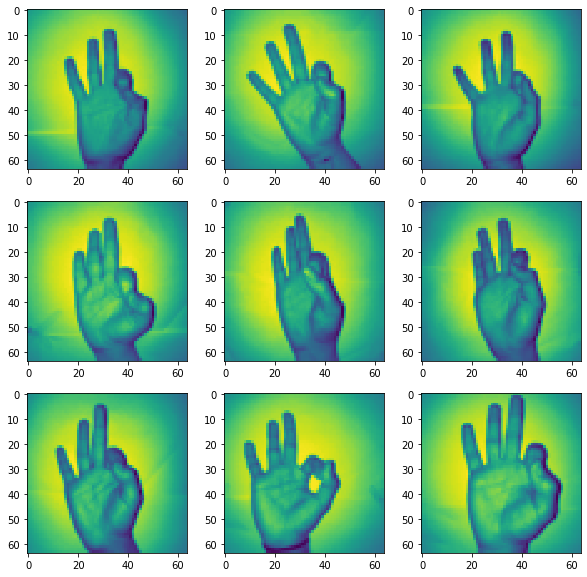

In [7]:
fig=plt.figure(figsize=(10,10))
for i in range(1, 10):
    img = X[i]
    data = np.concatenate((X[i]))
    fig.add_subplot(3, 3, i)
    plt.imshow(img)
plt.show()

In [8]:
Xreshape = np.reshape(Xsample,(Xsample.shape[0], Xsample.shape[1], Xsample.shape[2], 1))
Xreshape.shape

(9, 64, 64, 1)

## Générer des variantes avec les fonctions de Data Augmentation de Keras

In [9]:
from keras_preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


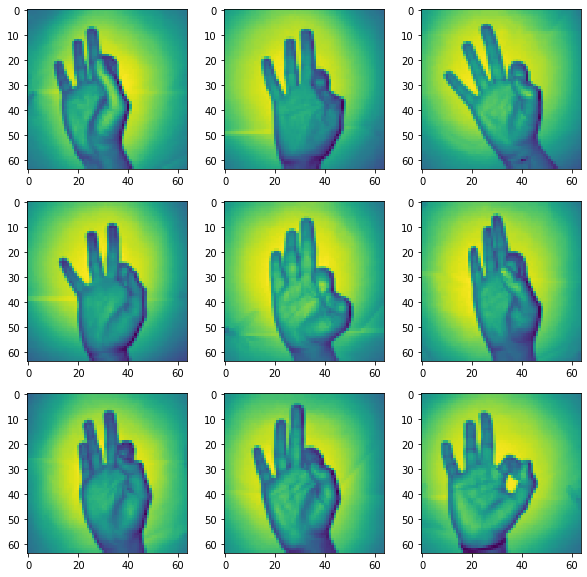

In [11]:
# Appliquer feature standardization

datagen = ImageDataGenerator(featurewise_std_normalization=True)

datagen.fit(Xreshape)
imgs = datagen.flow(Xreshape, shuffle=False, batch_size=9)

plt.figure(figsize=(10, 10))
i = 1
for img in imgs:
    plt.subplot(3, 3, i)
    plt.imshow(img[i-1].reshape(64,64))
    i += 1
    if i > 9:
        break
plt.show()

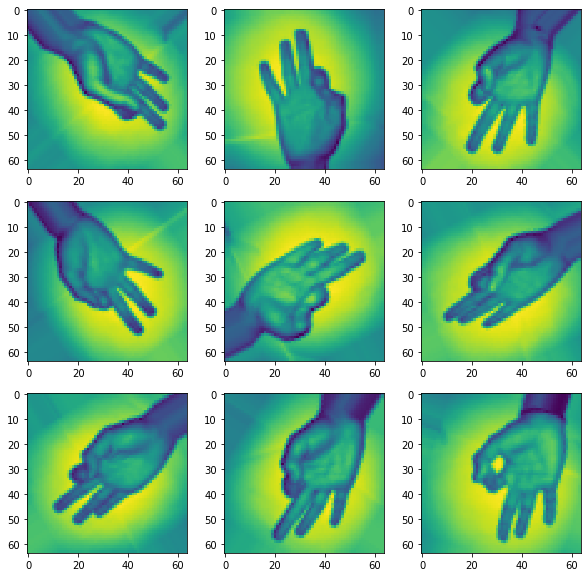

In [14]:
# Appliquer une rotation aléatoire

datagen = ImageDataGenerator(rotation_range=180)

datagen.fit(Xreshape)
imgs = datagen.flow(Xreshape, shuffle=False, batch_size=9)

plt.figure(figsize=(10, 10))
i = 1
for img in imgs:
    plt.subplot(3, 3, i)
    plt.imshow(img[i-1].reshape(64,64))
    i += 1
    if i > 9:
        break
plt.show()

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


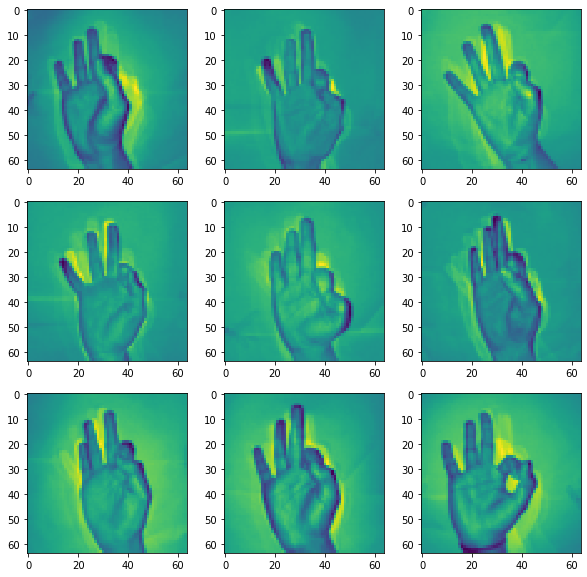

In [10]:
# Appliquer le ZCA whitening

datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(Xreshape)
imgs = datagen.flow(Xreshape, shuffle=False, batch_size=9)

plt.figure(figsize=(10, 10))
i = 1
for img in imgs:
    plt.subplot(3, 3, i)
    plt.imshow(img[i-1].reshape(64,64))
    i += 1
    if i > 9:
        break
plt.show()

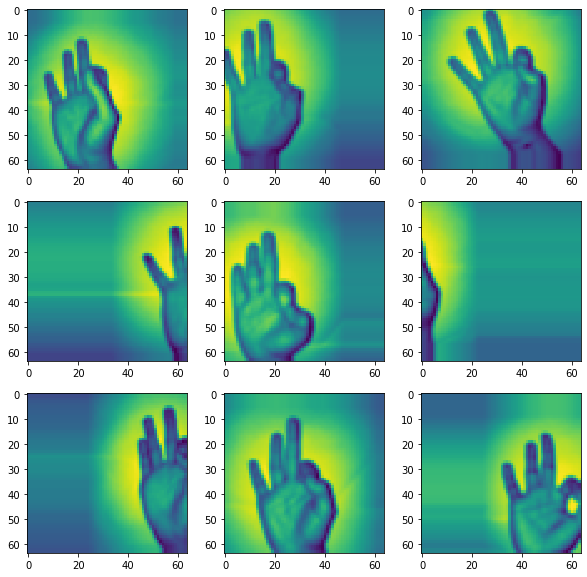

In [15]:
# Appliquer une translation aléatoire

datagen = ImageDataGenerator(width_shift_range=np.random.random_sample(), height_shift_range=np.random.random_sample())

datagen.fit(Xreshape)
imgs = datagen.flow(Xreshape, shuffle=False, batch_size=9)

plt.figure(figsize=(10, 10))
i = 1
for img in imgs:
    plt.subplot(3, 3, i)
    plt.imshow(img[i-1].reshape(64,64))
    i += 1
    if i > 9:
        break
plt.show()

## Application du modele

In [ ]:
datagen.fit(Xreshape)

In [ ]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=epochs)